<a href="https://colab.research.google.com/github/itsmeeeeeee/Medical-RAG/blob/main/medical_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Retrieval Augmented Generation (RAG) System mit medizinische Daten***



#**Datenextraktion**

**llmsherpa**

Das Open-Source "llmsherpa" Framework bietet Entwicklern APIs, die Projekte mit großen Sprachmodellen (LLMs) effizienter gestalten.  

**LayoutPDFReader**

Eine der zentralen Bibliotheken ist der "LayoutPDFReader", der präzise Textextraktion aus PDF-Dokumenten ermöglicht und ideal für medizinische Datenanwendungen ist.

Dieser Reader erkennt und strukturiert PDF-Inhalte durch:


- **Abschnitte und Unterabschnitte**: Erfasst die Ebenen und Struktur der Abschnitte.
- **Absätze**: Kombiniert Zeilen zu vollständigen Absätzen.
- **Verknüpfungen**: Identifiziert Verknüpfungen zwischen Abschnitten und Absätzen.
- **Tabellen**: Erkennt Tabellen und ordnet sie dem jeweiligen Abschnitt zu.
- **Listen**: Identifiziert Listen und deren Verschachtelungen.
- **Zusammenführung über Seiten**: Fügt Inhalte, die über mehrere Seiten verteilt sind, korrekt zusammen.
- **Entfernung von Kopf- und Fußzeilen**: Entfernt wiederholende Kopf- und Fußzeilen usw.
- Weitere Informationen: [GitHub-Seite von llmsherpa](https://github.com/nlmatics/llmsherpa/blob/main/README.md), [Blog](https://medium.com/llamaindex-blog/mastering-pdfs-extracting-sections-headings-paragraphs-and-tables-with-cutting-edge-parser-faea18870125) und [Dokumentation Seite](https://llmsherpa.readthedocs.io/en/latest/llmsherpa.readers.html#module-llmsherpa.readers.layout_reader)

In [ ]:
#llmsherpa Bibliothek installieren.
!pip install llmsherpa
# llama-index, trulens_eval, openai, Bibliotheken installieren
!pip install trulens_eval llama_index openai
#!pip install llama-index

**Daten Lesen**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import os module to interact with the filesystem
import os

# Define the directory path
directory_path = "/content/drive/MyDrive/row_data/"

# List of filenames
files = [
    "01. The Practical Course in Clinical Medicine Autor Władysław Grabski, Dariusz Nowak.pdf",
    "1. Diabetes  Author Dr Mrs Anjali Kulkarni.pdf",
    "1. General Pathology Author Mesele Bezabeh, Abiye Tesfaye.pdf",
    "1. Neurology Introduction Author MUK Publications.pdf"
]


In [ ]:

# This step in using LayoutPDFReader to provide a url or file path to it and get back a document object.
from llmsherpa.readers import LayoutPDFReader

llmsherpa_api_url = "https://readers.llmsherpa.com/api/document/developer/parseDocument?renderFormat=all"
pdf_reader = LayoutPDFReader(llmsherpa_api_url)

# Access and read each file
for file_name in files:
    file_path = os.path.join(directory_path, file_name)
    if os.path.exists(file_path):
        print(f"Accessing file: {file_path}")
        doc = pdf_reader.read_pdf(file_path)
    else:
         print(f"File not found: {file_path}")

Accessing file: /content/drive/MyDrive/row_data/01. The Practical Course in Clinical Medicine Autor Władysław Grabski, Dariusz Nowak.pdf
Accessing file: /content/drive/MyDrive/row_data/1. Diabetes  Author Dr Mrs Anjali Kulkarni.pdf
Accessing file: /content/drive/MyDrive/row_data/1. General Pathology Author Mesele Bezabeh, Abiye Tesfaye.pdf
Accessing file: /content/drive/MyDrive/row_data/1. Neurology Introduction Author MUK Publications.pdf


In [ ]:
"""
# extrahierte Text
type(doc)
print(doc.to_text())
"""


'\n# extrahierte Text\ntype(doc)\nprint(doc.to_text())\n'

**Retrieving Chunks from the PDF**

The chunks method provides coherent pieces or segments of content from the parsed PDF


In [ ]:

for chunk in doc.chunks():
    print(chunk.to_text())

Neurology : Introduction 1 1 Neurology : Introduction Neurology implies the branch of medicine pertaining to the study and treatment of disorders of the nervous system.
The nervous system is a complex, sophisticated system that regulates and coordinates body activities.
It consists of two major divisions:
• First is Central nervous system: the brain and spinal cord, and
• Second Peripheral nervous system: all other neural elements, such as eyes, ears, skin, and other “sensory receptors”.
A doctor who has specialisation in neurology is known as a neurologist.
The neurologist treats disorders that affect the brain, spinal cord, and nerves, such as:
• Demyelinating diseases of the central nervous system, such as multiple sclerosis
• Cerebrovascular disease, such as stroke
• Headache disorders
• Infections of the brain and peripheral nervous system
• Neurodegenerative disorders, such as Alzheimer’s disease, Parkinson’s disease, and Amyotrophic Lateral Sclerosis (Lou Gehrig’s disease)
• Mov

**Tabellen Extraktion PDF Dokumente**

In [ ]:

for table in doc.tables():
    print(table.to_text())

print("Es gibt insgesamt ",len(doc.tables()), "Tabellen")

 | Term | Definition
 | --- | ---
 | CNS | CNS stands for central nervous system and includes the brain and spinal cord.
 | PNS | PNS stands for peripheral nervous system and includes all nerves outside of the CNS
 | Neuron | Neurons (nerve cells) are the building blocks of all nerves. Individual nerves are made up of thousands of neurons.
 | Action potential | Action potentials are the electrical impulses (messages) that travel throughout the nervous system
 | EPSP | EPSP stands for excitory post-synaptic potential. It is a positive change that makes a nerve more likely to fire an action potential
 | IPSP | IPSP stands for inhibitory post-synaptic potential. It is a negative change that makes a nerve less likely to fire an action potential
 | Depolarisation | This refers to the charge within a neuron becoming positive and reaching threshold. Resulting in an action potential being fired.
 | Hyperpolarisation | This refers to the charge within a neuron becoming more negative and an acti

#Indexierung

**LlamaIndex**

Die Hauptfunktion von LlamaIndex-Frameworks ist, Daten zu indexieren. Diese Indexierung strukturiert umfangreiche und komplexe Datenquellen effizient und erleichtert deren Nutzung für große Sprachmodelle (LLMs). Damit können RAG-Systeme schneller und präziser relevante Informationen finden.

Folgende Klassen werden importiert
- **VectorStoreIndex:** Ein Index, der Vektorspeicherung nutzt, um relevante Informationen für die Anfrage zu finden.

- **ServiceContext:** Hält verschiedene Service-Komponenten, die für die Indexierung und Abfrage verwendet werden, z. B. Tokenizer oder Vektor-Embedding-Modelle.

- **StorageContext:** Ermöglicht die Speicherung und Wiederherstellung von Indexen und Abfragen.

- **load_index_from_storage:** Hilft dabei, einen bereits vorhandenen Index aus einem vorherigen Speicherstand zu laden, was die effiziente Wiederverwendung von Daten ermöglicht.




In [ ]:
# benötigten Klassen von Lammaindex importieren
from llama_index.core import VectorStoreIndex, ServiceContext,StorageContext,load_index_from_storage

Der Import Document aus dem llama_index.core.readers-Modul ermöglicht die Erstellung, Bearbeitung und Verwaltung von Dokumenten im LlamaIndex-Framework

In [ ]:
from llama_index.core.readers import Document

In [ ]:
# Sets the environment variable for the OpenAI API key
import os
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
from llama_index.llms.openai import OpenAI

Durch die Nutzung des **ServiceContext** und des definierten **System-Prompts** wird der Chatbot so konfiguriert, dass er ausschließlich Informationen auf Englisch aus den bereitgestellten Dokumenten generiert und keine externen Quellen verwendet.

In [ ]:

llm_context_query__service_context = ServiceContext.from_defaults(
llm=OpenAI(
model="gpt-3.5-turbo",
temperature=0.1,
),
system_prompt=
"""You are a friendly chatbot. Use exclusively only the following context to answer
the question at the end.Use only the available Information. If the answer is not from the context, then say "I have no information regarding your inquiry." Always respond in English.

        Context: {context}

        Question: {question}

        Helpful answer:
""")


<ipython-input-60-e043e7024dae>:1: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  llm_context_query__service_context = ServiceContext.from_defaults(


In [ ]:
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core import VectorStoreIndex
from llama_index.core import Settings

# global
Settings.embed_model = OpenAIEmbedding()

embed_model = Settings.embed_model


service_context = ServiceContext.from_defaults(embed_model=embed_model)

<ipython-input-24-abd65a37c694>:11: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context = ServiceContext.from_defaults(embed_model=embed_model)


In [ ]:
!pip install llama-index-embeddings-huggingface


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.2/853.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
"""
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import Settings

Settings.embed_model = HuggingFaceEmbedding(
    model_name="BAAI/bge-small-en-v1.5"
)

embed_model = Settings.embed_model


service_context = ServiceContext.from_defaults(embed_model=embed_model)
"""

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-42-8ed8a79d7587>:11: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context = ServiceContext.from_defaults(embed_model=embed_model)


In [ ]:
PERSIST_DIR = "./storage"
if not os.path.exists(PERSIST_DIR):
    # Create a new index because the storage directory does not exist
    os.makedirs(PERSIST_DIR)  # Ensure the directory is created where the index will be stored
    index = index=VectorStoreIndex([],service_context=service_context)
    for chunk in doc.chunks():
      index.insert(Document(text=chunk.to_context_text(),extra_info={}))
    index.storage_context.persist(persist_dir=PERSIST_DIR)  # Persist the newly created index
else:
    # Load the existing index from the storage
    storage_context = StorageContext.from_defaults(persist_dir=PERSIST_DIR)
    index = load_index_from_storage(
        storage_context,
        service_context=service_context
    )

In [ ]:
# Converts the index into a query engine, which can be used to perform queries.
query_engine=index.as_query_engine(service_contex=llm_context_query__service_context)

In [ ]:
response_0=query_engine.query("Give me some information about weather ?")


In [ ]:
print(response_0)

I'm sorry, I cannot provide information about the weather as it is not related to the context provided.


Executes a query

Neurology


In [ ]:
response_1=query_engine.query("What is a neurologist?")
print("response_1: ",response_1)
print("\n")
response_2=query_engine.query("What is a Treatment by Neurologist?")
print("response_2: ",response_2)
print("\n")
response_3=query_engine.query("What are Neurologists Tasks?")
print("response_3: ",response_3)
print("\n")
response_4=query_engine.query("What is the Nervous System?")
print("response_4: ",response_4)
print("\n")
response_5=query_engine.query("what is Neurophysiology?")
print("response_5: ",response_5)
print("\n")
response_6=query_engine.query("what are Nerve Cells?")
print("response_6: ",response_6)
print("\n")
response_7=query_engine.query("What is an Axon?")
print("response_7: ",response_7)
print("\n")
response_8=query_engine.query("What is Pure alexia?")
print("response_8: ",response_8)
print("\n")
response_9=query_engine.query("What is agnosia and what is the treatment about agnosia?")
print("response_9: ",response_9)
print("\n")
response_10=query_engine.query("What are the types of agnosia?")
print("response_10: ",response_10)
print("\n")
response_11=query_engine.query("What is Alzheimer and what are the atypical Alzheimer’s disease?")
print("response_11: ",response_11)

response_1:  A neurologist is a medical doctor who specializes in diagnosing, treating, and managing disorders of the brain and nervous system, including pediatric neurologists who focus on children's neurological disorders.


response_2:  I do not have any information regarding your request.


response_3:  Neurologists' tasks include conducting research as neuroscientists, treating patients, and teaching neurology to medical students.


response_4:  The nervous system is a control system of the body that functions similar to a computer, with the brain acting like software making decisions and the nerves serving as hardware or wiring to communicate those decisions throughout the body.


response_5:  Neurophysiology is a medical specialty that focuses on the relationship between the brain and the peripheral nervous system.


response_6:  Nerve cells are cells that have different shapes and sizes and possess one or more processes.


response_7:  The axon is a part of the neuron that carr

In [ ]:
alzheimer1=query_engine.query("What is Alzheimer?")
print(alzheimer1)

Alzheimer's disease is a physical disease that affects the brain.


In [ ]:
alzheimer2=query_engine.query("What is Alzheimer disease?")
print(alzheimer2)


Alzheimer's disease is a physical disease that affects the brain, causing symptoms such as a gradual decrease in the ability to think and remember, emotional problems, language difficulties, and a decrease in motivation. It is the most common type of dementia, accounting for 50% to 70% of cases.


In [ ]:
alzheimer3=response_11=query_engine.query("what is atypical Alzheimer’s disease?")
print(alzheimer3)

Atypical Alzheimer’s disease is a form of Alzheimer’s disease where the earliest symptoms are not memory loss. It is characterized by the same underlying damage of plaques and tangles as typical Alzheimer’s disease, but it affects a different part of the brain first, not the hippocampus. Atypical Alzheimer’s disease is less common in individuals over 65 years old, accounting for around five percent of cases in this age group. However, it is more prevalent in individuals under 65, particularly in cases of early-onset Alzheimer’s disease, where it can represent up to one-third of cases.


Diabetes

In [ ]:
response_12=query_engine.query("What is diabetes?")
print("response_12: ",response_12)
print("\n")
response_13=query_engine.query("How to diagnose diabetes?")
print("response_13: ",response_13)
print("\n")
response_14=query_engine.query("How can one test themselves for diabetes?")
print("response_14: ",response_14)
print("\n")
response_15=query_engine.query("What is Insulin injection and how to do it?")
print("response_15: ",response_15)
print("\n")
response_16=query_engine.query("What is the meaning of Hypoglycemia?")
print("response_16: ",response_16)
print("\n")
response_17=query_engine.query("What are long term complications of diabetes and how to manage it?")
print("response_17: ",response_17)


response_12:  Diabetes is a condition that can be associated with vascular dementia or signs of blood vessel disease. It is a metabolic disorder characterized by high blood sugar levels resulting from either insufficient insulin production or the body's ineffective use of insulin.


response_13:  Doctors diagnose diabetes through a combination of methods including a medical history review, physical examination, and laboratory tests. Symptoms such as increased thirst, frequent urination, unexplained weight loss, and fatigue are also considered during the diagnostic process.


response_14:  It is generally recommended to consult with a healthcare provider for genetic tests.


response_15:  Insulin injection is a medical procedure where insulin, a hormone that helps regulate blood sugar levels, is administered into the body through a needle and syringe or an insulin pen. To perform an insulin injection, one should first wash their hands, prepare the insulin dose as prescribed by a healthc

In [ ]:
insulin1=query_engine.query("What is an insulin syringe and how can one handle it?")
print(insulin1)

I do not have any information regarding your request.


In [ ]:
insulin2=query_engine.query("What are insulin syringes?")
print(insulin2)

Insulin syringes are used to administer insulin for the treatment of diabetes.


In [ ]:
insulin3=query_engine.query("What are insulin syringe?")
print(insulin3)

I do not have any information regarding your request.


In [ ]:
insulin4=query_engine.query("How to prepare insulin?")
print(insulin4)

I do not have any information regarding your request.


In [ ]:
insulin5=query_engine.query("How to prepare insulin shot?")
print(insulin5)

Avoid giving complex directions.


In [ ]:
hypoglycemia=query_engine.query("What means Hypoglycemia?")
print(hypoglycemia)

Hypoglycemia refers to a condition characterized by low blood sugar levels.


Clinical Medicine

In [ ]:
response_18=query_engine.query("What are the general complaints in clinical medicine?")
print("response_18: ",response_18)
print("\n")
response_19=query_engine.query("What does Dyspnoea mean?")
print("response_19: ",response_19)
print("\n")
response_20=query_engine.query("What is the meaning of stabbing pain in chest?")
print("response_20: ",response_20)
print("\n")
response_21=query_engine.query("How to do a physical examination?")
print("response_21: ",response_21)
print("\n")
response_22=query_engine.query("Why are vital symptoms important?")
print("response_22: ",response_22)
print("\n")
response_23=query_engine.query("What shows the ECG?")
print("response_23: ",response_23)
print("\n")
response_24=query_engine.query("What is the meaning of QRS complex?")
print("response_24: ",response_24)

response_18:  Memory or other cognitive (thought-processing) complaints by the person or a person who knows the patient well, headaches, and sciatica or other mechanical radiculopathies are general complaints in clinical medicine.


response_19:  I do not have any information regarding your request.


response_20:  Pleurodynia, also known as Bornholm disease, epidemic myalgia, and devil's grip, is a condition caused by the Coxsackie virus that can result in stabbing pain in the chest.


response_21:  The physical examination is performed by starting with taking a comprehensive medical history and then focusing on evaluating the nervous system. Components of the examination include assessing cognitive function, cranial nerves, motor strength, sensation, reflexes, coordination, and gait.


response_22:  Vital symptoms are important because they can provide valuable information about a person's overall health status and help healthcare professionals assess the functioning of essential bod

In [ ]:
dyspnoea1=query_engine.query("What is DYSPNOEA?")
print(dyspnoea1)

I do not have any information regarding your request.


In [ ]:
dyspnoea2=query_engine.query("What happens in case of dyspnea?")
print(dyspnoea2)

I do not have any information regarding your request.


General Pathology

In [ ]:
response_25=query_engine.query("What is Pathogenesis?")
print("response_25: ",response_25)
print("\n")
response_26=query_engine.query("What is Hypertrophy?")
print("response_26: ",response_26)
print("\n")
response_27=query_engine.query("What is Hyperplasia?")
print("response_27: ",response_27)
print("\n")
response_28=query_engine.query("What is Atrophy?")
print("response_28: ",response_28)
print("\n")
response_29=query_engine.query("What is Bilirubin?")
print("response_29: ",response_29)
print("\n")
response_30=query_engine.query("What are the Diagnostic techniques used in pathology?")
print("response_30: ",response_30)
print("\n")
response_31=query_engine.query("What does Autopsy mean?")
print("response_31: ",response_31)
print("\n")
response_32=query_engine.query("What is the meaning of Clinical death and is it legal?")
print("response_32: ",response_32)

response_25:  Pathogenesis refers to the mechanism by which a disease develops.


response_26:  Hypertrophy is the enlargement of muscles, which can occur naturally in athletes due to exercise. It can also happen in certain medical conditions like myotonia congenita, where increased muscle size is combined with strength and stiffness.


response_27:  I do not have any information regarding your request.


response_28:  Atrophy is the process of degeneration or shrinking of a specific part of the body, often due to a decrease in cell size or number.


response_29:  I do not have any information regarding your request.


response_30:  Biopsy testing and Epidermal nerve fiber density testing (ENFD) are diagnostic techniques used in pathology.


response_31:  Autopsy refers to the post-mortem examination of the body to determine the cause of death or to study various diseases that may have affected the individual during their lifetime.


response_32:  Clinical death refers to the moment wh

In [ ]:
hyperplasia=query_engine.query("What is Hyperplasia?")
print(hyperplasia)


Hyperplasia is a condition characterized by an abnormal increase in the number of cells in an organ or tissue, leading to its enlargement.


In [ ]:
bilirubin1=query_engine.query("is Bilirubin a yellowish pigment?")
print(bilirubin1)


Yes, Bilirubin is a yellowish pigment.


In [ ]:
bilirubin2=query_engine.query("what is the meaning of is Bilirubin?")
print(bilirubin2)

Bilirubin is a yellowish substance that forms when red blood cells break down in the body.


Get the Raw JSON

To get the complete json returned by llmsherpa service and process it differently, simply get the json attribute

In [ ]:
doc.json

[{'block_class': 'cls_0',
  'block_idx': 0,
  'level': 0,
  'page_idx': 0,
  'sentences': ['Neurology : Introduction 1 1 Neurology : Introduction Neurology implies the branch of medicine pertaining to the study and treatment of disorders of the nervous system.',
   'The nervous system is a complex, sophisticated system that regulates and coordinates body activities.',
   'It consists of two major divisions:'],
  'tag': 'para'},
 {'block_class': 'cls_5',
  'block_idx': 1,
  'level': 1,
  'page_idx': 0,
  'sentences': ['• First is Central nervous system: the brain and spinal cord, and'],
  'tag': 'list_item'},
 {'block_class': 'cls_5',
  'block_idx': 2,
  'level': 1,
  'page_idx': 0,
  'sentences': ['• Second Peripheral nervous system: all other neural elements, such as eyes, ears, skin, and other “sensory receptors”.'],
  'tag': 'list_item'},
 {'block_class': 'cls_4',
  'block_idx': 3,
  'level': 0,
  'page_idx': 0,
  'sentences': ['A doctor who has specialisation in neurology is known 

# **Evaluieren**

- For evaluation, we will leverage the "hallucination triad" of groundedness context relevance and answer relevance: [concepts](https://www.trulens.org/trulens_eval/getting_started/core_concepts/rag_triad/)

- Implementation based on: [link](https://colab.research.google.com/github/truera/trulens/blob/main/trulens_eval/examples/quickstart/llama_index_quickstart.ipynb)

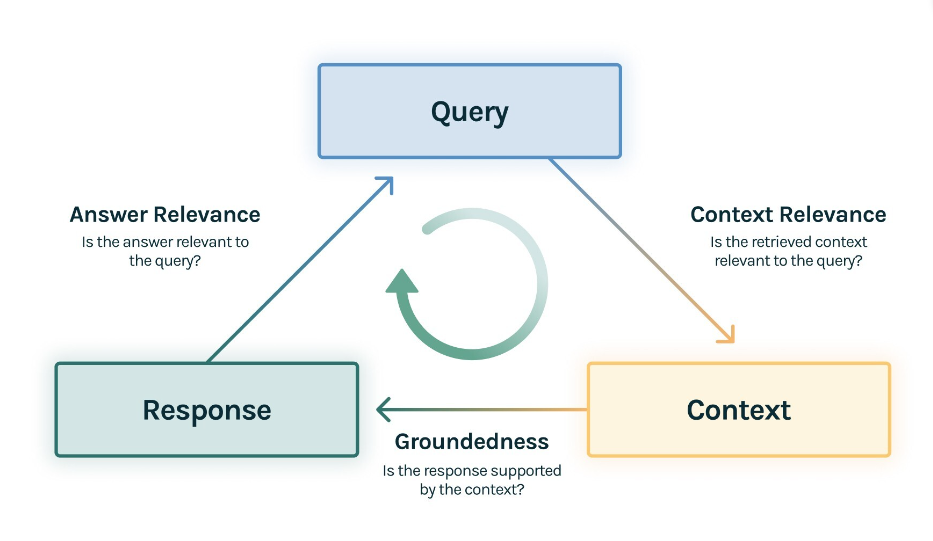

In [ ]:
#import from TruLens
from trulens_eval import Tru
tru = Tru()


In [ ]:
from trulens_eval.feedback.provider import OpenAI
from trulens_eval import Feedback
import numpy as np

# Initialize provider class
provider = OpenAI()

# select context to be used in feedback. the location of context is app specific.
from trulens_eval.app import App
context = App.select_context(query_engine)

# Define a groundedness feedback function
f_groundedness = (
    Feedback(provider.groundedness_measure_with_cot_reasons)
    .on(context.collect()) # collect context chunks into a list
    .on_output()
)

# Question/answer relevance between overall question and answer.
f_answer_relevance = (
    Feedback(provider.relevance)
    .on_input_output()
)
# Question/statement relevance between question and each context chunk.
f_context_relevance = (
    Feedback(provider.context_relevance_with_cot_reasons)
    .on_input()
    .on(context)
    .aggregate(np.mean)
)

✅ In groundedness_measure_with_cot_reasons, input source will be set to __record__.app.query.rets.source_nodes[:].node.text.collect() .
✅ In groundedness_measure_with_cot_reasons, input statement will be set to __record__.main_output or `Select.RecordOutput` .
✅ In relevance, input prompt will be set to __record__.main_input or `Select.RecordInput` .
✅ In relevance, input response will be set to __record__.main_output or `Select.RecordOutput` .
✅ In context_relevance_with_cot_reasons, input question will be set to __record__.main_input or `Select.RecordInput` .
✅ In context_relevance_with_cot_reasons, input context will be set to __record__.app.query.rets.source_nodes[:].node.text .


In [ ]:
# Instrument app for logging with TruLens
from trulens_eval import TruLlama
tru_query_engine_recorder = TruLlama(query_engine,
    app_id='LlamaIndex_App1',
    feedbacks=[f_groundedness, f_answer_relevance, f_context_relevance])

In [ ]:

# Liste der Fragen
question_q = [
  #  "What is a neurologist?",
    "What is a Treatment by Neurologist?",
 #   "What are Neurologists Tasks?",
    "What is the Nervous System?",
    "What is Neurophysiology?",
 #   "What are Nerve Cells?",
 #   "What is an Axon?",
 #   "What is Pure alexia?",
    "What is agnosia and what is the treatment about agnosia?",
    "What are the types of agnosia?",
    "What is Alzheimer and what are the atypical Alzheimer’s disease?",
    "What is Alzheimer?",
    "What is Alzheimer disease?",
    "What is atypical Alzheimer’s disease?",
#    "What is diabetes?",
    "How to diagnose diabetes?",
#    "How can one test themselves for diabetes?",
    "What is Insulin injection and how to do it?",
#    "What is the meaning of Hypoglycemia?",
#    "What are long term complications of diabetes and how to manage it?",
#    "What is an insulin syringe and how can one handle it?",
    "What are insulin syringes?",
    "What are insulin syringe?",
    "How to prepare insulin?",
    "How to prepare insulin shot?",
#    "What means Hypoglycemia?",
#    "What are the general complaints in clinical medicine?",
    "What does Dyspnoea mean?",
    "What is the meaning of stabbing pain in chest?",
#    "How to do a physical examination?",
#    "Why are vital symptoms important?",
#    "What shows the ECG?",
#    "What is the meaning of QRS complex?",
#    "What is DYSPNOEA?",
#    "What happens in case of dyspnea?",
#    "What is Pathogenesis?",
#    "What is Hypertrophy?",
#    "What is Hyperplasia?",
#    "What is Atrophy?",
    "What is Bilirubin?",
    "is Bilirubin a yellowish pigment?",
 #   "What are the Diagnostic techniques used in pathology?",
  #  "What does Autopsy mean?",
    "What is the meaning of Clinical death and is it legal?"
]

# Kontextmanager, um jede Frage einzeln zu stellen
with tru_query_engine_recorder as recording:
    for question in question_q:
        response = query_engine.query(question)
        print(f"Query: {question}")
        print(f"Response: {response}")
        print("\n")



[nltk_data] Downloading package punkt to /root/nltk_data...


Query: What is a Treatment by Neurologist?
Response: I do not have any information regarding your request.




[nltk_data]   Unzipping tokenizers/punkt.zip.


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

Query: What is the Nervous System?
Response: The nervous system is a control system of the body that functions similarly to a computer, with the brain acting as the software responsible for decision-making and the nerves serving as the hardware or wiring that communicates these decisions throughout the body.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

Query: What is Neurophysiology?
Response: Neurophysiology is a medical specialty that focuses on the relationship between the brain and the peripheral nervous system.


Query: What is agnosia and what is the treatment about agnosia?
Response: Agnosia is a condition where individuals have difficulty recognizing or interpreting sensory information. The treatment for agnosia involves presenting information in different ways than the damaged sensory modality, utilizing various types of therapies to reverse its effects, and potentially using occupational therapy or speech therapy depending on the cause of the condition. Additionally, methods can be employed to help individuals become aware of their deficits and recognize the impairment in perception or recognition that they may have.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/3 [00:00<?, ?it/s]

Query: What are the types of agnosia?
Response: The types of agnosia are apperceptive and associative agnosias.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

Query: What is Alzheimer and what are the atypical Alzheimer’s disease?
Response: I do not have any information regarding your request.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

Query: What is Alzheimer?
Response: I do not have any information regarding your request.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/2 [00:00<?, ?it/s]

Query: What is Alzheimer disease?
Response: Alzheimer's disease is a type of dementia that is characterized by symptoms such as short-term memory loss and difficulties in finding words. It accounts for a significant percentage of dementia cases and can lead to brain atrophy in severe cases.


Query: What is atypical Alzheimer’s disease?
Response: Atypical Alzheimer’s disease is a form of the condition where the earliest symptoms are not memory loss.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

Query: How to diagnose diabetes?
Response: Routine blood tests are generally performed to diagnose diabetes.


Query: What is Insulin injection and how to do it?
Response: I do not have any information regarding your request.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

Query: What are insulin syringes?
Response: Insulin syringes are used to administer insulin for the treatment of diabetes.


Query: What are insulin syringe?
Response: I do not have any information regarding your request.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

Query: How to prepare insulin?
Response: I do not have any information regarding your request.


Query: How to prepare insulin shot?
Response: I do not have any information regarding your request.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

Query: What does Dyspnoea mean?
Response: I do not have any information regarding your request.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

Query: What is the meaning of stabbing pain in chest?
Response: Pleurodynia, also known as Bornholm disease, epidemic myalgia, and devil’s grip, is the meaning of stabbing pain in the chest.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

Query: What is Bilirubin?
Response: I do not have any information regarding your request.




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Groundedness per statement in source:   0%|          | 0/1 [00:00<?, ?it/s]

Query: is Bilirubin a yellowish pigment?
Response: Yes, Bilirubin is a yellowish pigment.


Query: What is the meaning of Clinical death and is it legal?
Response: I do not have any information regarding your request.




In [ ]:
tru.run_dashboard()

Starting dashboard ...
npx: installed 22 in 3.779s

Go to this url and submit the ip given here. your url is: https://deep-animals-lie.loca.lt

  Submit this IP Address: 35.189.188.131



<Popen: returncode: None args: ['streamlit', 'run', '--server.headless=True'...>

In [ ]:
# The results of the feedback functions can be rertireved from
# `Record.feedback_results` or using the `wait_for_feedback_result` method. The
# results if retrieved directly are `Future` instances (see
# `concurrent.futures`). You can use `as_completed` to wait until they have
# finished evaluating or use the utility method:

#for feedback, feedback_result in recs.wait_for_feedback_results().items():
 #   print(feedback.name, feedback_result.result)

# See more about wait_for_feedback_results:

#help(recs.wait_for_feedback_results)

In [ ]:
records, feedback = tru.get_records_and_feedback(app_ids=["LlamaIndex_App1"])

records

,app_id,app_json,type,record_id,input,output,tags,record_json,cost_json,perf_json,ts,relevance,groundedness_measure_with_cot_reasons,context_relevance_with_cot_reasons,relevance_calls,groundedness_measure_with_cot_reasons_calls,context_relevance_with_cot_reasons_calls,latency,total_tokens,total_cost
0,LlamaIndex_App1,"{""tru_class_info"": {""name"": ""TruLlama"", ""modul...",RetrieverQueryEngine(llama_index.core.query_en...,record_hash_4c6ef5ac04a27675634e396f7751a055,"""What is a Treatment by Neurologist?""","""I do not have any information regarding your ...",-,"{""record_id"": ""record_hash_4c6ef5ac04a27675634...","{""n_requests"": 2, ""n_successful_requests"": 2, ...","{""start_time"": ""2024-06-09T09:59:05.339974"", ""...",2024-06-09T09:59:08.369896,1.0,0.0,0.60,[{'args': {'prompt': 'What is a Treatment by N...,[{'args': {'source': ['WHO’S NEUROLOGIST > Tre...,[{'args': {'question': 'What is a Treatment by...,3,228,0.000333
1,LlamaIndex_App1,"{""tru_class_info"": {""name"": ""TruLlama"", ""modul...",RetrieverQueryEngine(llama_index.core.query_en...,record_hash_ada5ac88de06065e97fb5d839f839d9b,"""What is the Nervous System?""","""The nervous system is a control system of the...",-,"{""record_id"": ""record_hash_ada5ac88de06065e97f...","{""n_requests"": 2, ""n_successful_requests"": 2, ...","{""start_time"": ""2024-06-09T09:59:09.356147"", ""...",2024-06-09T09:59:13.879412,0.8,1.0,0.85,[{'args': {'prompt': 'What is the Nervous Syst...,[{'args': {'source': ['ANATOMY AND FUNCTION OF...,[{'args': {'question': 'What is the Nervous Sy...,4,356,0.000544
2,LlamaIndex_App1,"{""tru_class_info"": {""name"": ""TruLlama"", ""modul...",RetrieverQueryEngine(llama_index.core.query_en...,record_hash_19b85b8861b2d8efc2188be9069e4d8d,"""What is Neurophysiology?""","""Neurophysiology is a medical specialty that f...",-,"{""record_id"": ""record_hash_19b85b8861b2d8efc21...","{""n_requests"": 2, ""n_successful_requests"": 2, ...","{""start_time"": ""2024-06-09T09:59:14.520250"", ""...",2024-06-09T09:59:17.161380,0.8,1.0,0.85,[{'args': {'prompt': 'What is Neurophysiology?...,[{'args': {'source': ['Neurophysiology > Neuro...,[{'args': {'question': 'What is Neurophysiolog...,2,359,0.000541
3,LlamaIndex_App1,"{""tru_class_info"": {""name"": ""TruLlama"", ""modul...",RetrieverQueryEngine(llama_index.core.query_en...,record_hash_a3495e86cf83d4cf2dff7745c445cf1a,"""What is agnosia and what is the treatment abo...","""Agnosia is a condition where individuals have...",-,"{""record_id"": ""record_hash_a3495e86cf83d4cf2df...","{""n_requests"": 2, ""n_successful_requests"": 2, ...","{""start_time"": ""2024-06-09T09:59:17.784533"", ""...",2024-06-09T09:59:21.645037,0.8,0.9,0.90,[{'args': {'prompt': 'What is agnosia and what...,[{'args': {'source': ['TREATMENT OF AGNOSIA\nF...,[{'args': {'question': 'What is agnosia and wh...,3,524,0.000808
4,LlamaIndex_App1,"{""tru_class_info"": {""name"": ""TruLlama"", ""modul...",RetrieverQueryEngine(llama_index.core.query_en...,record_hash_72ffbdfec0a0f875ba6105a03292bd42,"""What are the types of agnosia?""","""The types of agnosia are apperceptive and ass...",-,"{""record_id"": ""record_hash_72ffbdfec0a0f875ba6...","{""n_requests"": 2, ""n_successful_requests"": 2, ...","{""start_time"": ""2024-06-09T09:59:22.183089"", ""...",2024-06-09T09:59:25.455612,1.0,1.0,0.90,[{'args': {'prompt': 'What are the types of ag...,[{'args': {'source': ['AGNOSIA > Forms of Agno...,[{'args': {'question': 'What are the types of ...,3,353,0.000524
5,LlamaIndex_App1,"{""tru_class_info"": {""name"": ""TruLlama"", ""modul...",RetrieverQueryEngine(llama_index.core.query_en...,record_hash_1dd813e4380807cc2b4420ab64c4c011,"""What is Alzheimer and what are the atypical A...","""I do not have any information regarding your ...",-,"{""record_id"": ""record_hash_1dd813e4380807cc2b4...","{""n_requests"": 2, ""n_successful_requests"": 2, ...","{""start_time"": ""2024-06-09T09:59:26.564705"", ""...",2024-06-09T09:59:29.478089,1.0,0.0,0.70,[{'args': {'pr

In [ ]:
tru.get_leaderboard(app_ids=["LlamaIndex_App1"])

,relevance,context_relevance_with_cot_reasons,groundedness_measure_with_cot_reasons,latency,total_cost
app_id,,,,,
LlamaIndex_App1,0.93,0.591176,0.345,2.5,0.000463


In [ ]:
#Explore in a Dashboard
tru.run_dashboard() # open a local streamlit app to explore

#tru.stop_dashboard() # stop if needed

Starting dashboard ...
Config file already exists. Skipping writing process.
Credentials file already exists. Skipping writing process.
npx: installed 22 in 2.899s

Go to this url and submit the ip given here. your url is: https://angry-shoes-study.loca.lt

  Submit this IP Address: 35.189.188.131



<Popen: returncode: None args: ['streamlit', 'run', '--server.headless=True'...>